In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xrays-indiana-university/indiana_projections.csv
/kaggle/input/chest-xrays-indiana-university/indiana_reports.csv
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/349_IM-1697-2001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/607_IM-2196-1001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/2832_IM-1249-2001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/699_IM-2263-2001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/1931_IM-0602-2001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/947_IM-2442-2001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/2932_IM-1335-1001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/2303_IM-0882-1001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/291_IM-1313-2001.dcm.png
/kaggle

In [2]:
# !kaggle datasets download raddar/chest-xrays-indiana-university

In [3]:
!pip install swifter
!pip install opencv-python
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=cbc54711e7e0650bfaea90789024d7127163a0ee742ab19b35e8cffbad605faa
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [4]:
import pandas as pd 
import cv2
import numpy as np
import os
from glob import glob
import math
import matplotlib.pyplot as plt

# import swifter
import re
import html
import string
import unicodedata
from nltk.tokenize import word_tokenize

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
df  =pd.read_csv("/kaggle/input/chest-xrays-indiana-university/indiana_reports.csv")
# df[0:6]
df.count()

uid           3851
MeSH          3851
Problems      3851
image         3851
indication    3765
comparison    2685
findings      3337
impression    3820
dtype: int64

In [6]:
df['findings'].iloc[0:10].tolist()

['The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax.',
 'Borderline cardiomegaly. Midline sternotomy XXXX. Enlarged pulmonary arteries. Clear lungs. Inferior XXXX XXXX XXXX.',
 nan,
 'There are diffuse bilateral interstitial and alveolar opacities consistent with chronic obstructive lung disease and bullous emphysema. There are irregular opacities in the left lung apex, that could represent a cavitary lesion in the left lung apex.There are streaky opacities in the right upper lobe, XXXX scarring. The cardiomediastinal silhouette is normal in size and contour. There is no pneumothorax or large pleural effusion.',
 'The cardiomediastinal silhouette and pulmonary vasculature are within normal limits. There is no pneumothorax or pleural effusion. There are no focal areas of consolidation. Cholecystectomy clips are present. Small T-s

In [7]:
df.shape

(3851, 8)

In [8]:
df['impression'].unique().shape

(1771,)

In [9]:
df['MeSH'].unique().tolist()[:10]

['normal',
 'Cardiomegaly/borderline;Pulmonary Artery/enlarged',
 'Pulmonary Disease, Chronic Obstructive;Bullous Emphysema;Pulmonary Fibrosis/interstitial;Cicatrix/lung/upper lobe/left;Opacity/lung/apex/left/irregular;Opacity/lung/upper lobe/right/streaky;Opacity/pulmonary alveoli;Opacity/lung/bilateral/interstitial/diffuse',
 'Osteophyte/thoracic vertebrae/multiple/small;Thickening/pleura/apex/bilateral;Lung/hyperdistention/mild',
 'Pulmonary Atelectasis/base;Spondylosis/thoracic vertebrae;Arthritis/cervical vertebrae',
 'Calcified Granuloma/lung/upper lobe/right;Density/cardiophrenic angle/left',
 'Calcified Granuloma/lung/upper lobe/right',
 'Cardiac Shadow/borderline',
 'Lung/hyperdistention/mild;Markings/lung/interstitial/scattered/irregular/chronic',
 'Granulomatous Disease']

In [10]:
img = cv2.imread('/kaggle/input/chest-xrays-indiana-university/images/images_normalized/1_IM-0001-3001.dcm.png')

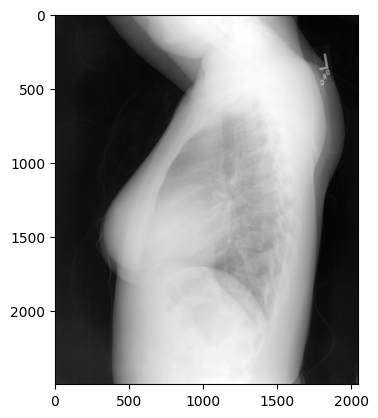

In [11]:
plt.imshow(img)
plt.show()

In [12]:
df2 = pd.read_csv("/kaggle/input/chest-xrays-indiana-university/indiana_projections.csv")
df2.head()

,uid,filename,projection
0,1,1_IM-0001-4001.dcm.png,Frontal
1,1,1_IM-0001-3001.dcm.png,Lateral
2,2,2_IM-0652-1001.dcm.png,Frontal
3,2,2_IM-0652-2001.dcm.png,Lateral
4,3,3_IM-1384-1001.dcm.png,Frontal


In [13]:
df2.projection.unique()

array(['Frontal', 'Lateral'], dtype=object)

In [14]:
import tensorflow 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [15]:
def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))


def remove_non_ascii(text):
    """Remove non-ASCII characters from list of tokenized words"""
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')


def to_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    """Remove punctuation from list of tokenized words"""
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


def replace_numbers(text):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    return re.sub(r'\d+', '', text)


def remove_whitespaces(text):
    return text.strip()


def remove_stopwords(words, stop_words):
    """
    :param words:
    :type words:
    :param stop_words: from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
    or
    from spacy.lang.en.stop_words import STOP_WORDS
    :type stop_words:
    :return:
    :rtype:
    """
    return [word for word in words if word not in stop_words]


def stem_words(words):
    """Stem words in text"""
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def lemmatize_words(words):
    """Lemmatize words in text"""

    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):
    """Lemmatize verbs in text"""

    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])

def text2words(text):
    return word_tokenize(text)

def normalize_text( text):
    text = remove_special_chars(text)
    text = remove_non_ascii(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    #words = text2words(text)
    #stop_words = stopwords.words('english')
    #words = remove_stopwords(words, stop_words)
    #words = stem_words(words)# Either stem ovocar lemmatize
    #words = lemmatize_words(words)
    #words = lemmatize_verbs(words)

    return text
  
def normalize_corpus(corpus):
    return [normalize_text(t) for t in corpus]
  

In [16]:
df['report'] = df[df.columns[1:]].apply(
    lambda x: ','.join(x.astype(str)),
    axis=1
)
df['report'].head()

0    normal,normal,Xray Chest PA and Lateral,Positi...
1    Cardiomegaly/borderline;Pulmonary Artery/enlar...
2    normal,normal,Xray Chest PA and Lateral,rib pa...
3    Pulmonary Disease, Chronic Obstructive;Bullous...
4    Osteophyte/thoracic vertebrae/multiple/small;T...
Name: report, dtype: object

In [17]:
df['report']

0       normal,normal,Xray Chest PA and Lateral,Positi...
1       Cardiomegaly/borderline;Pulmonary Artery/enlar...
2       normal,normal,Xray Chest PA and Lateral,rib pa...
3       Pulmonary Disease, Chronic Obstructive;Bullous...
4       Osteophyte/thoracic vertebrae/multiple/small;T...
                              ...                        
3846    Lung/hyperdistention/mild;Diaphragm/bilateral/...
3847    Spine/degenerative,Spine,Xray Chest PA and Lat...
3848    Opacity/lung/upper lobe/right/round/small;Gran...
3849    normal,normal, PA and lateral chest XXXX, XXXX...
3850    normal,normal,CHEST PA and LATERAL: on XXXX, X...
Name: report, Length: 3851, dtype: object

In [18]:
df['report'] = df['report'].apply(normalize_text)

In [19]:

df['report'] = '<start> '+df['findings']+' <end>'
df.dropna(subset = ['report'], inplace = True)


In [20]:
# import nltk
# nltk.download('punkt')

In [21]:
num_words = []
for row in df['report'].tolist():
#     print(len(word_tokenize(row)))
    num_words.append(len(word_tokenize(row)))
    

In [22]:
num_words= np.array(num_words)
print("min length             : ", num_words.min())
print("max length             : ", num_words.max())
print("50th percentile length : ", np.percentile(num_words,50))
print("75th percentile length : ", np.percentile(num_words,75))
print("90th percentile length : ", np.percentile(num_words,90))
print("95th percentile length : ", np.percentile(num_words,95))
print("98th percentile length : ", np.percentile(num_words,98))
print("98th percentile length : ", np.percentile(num_words,99))


min length             :  14
max length             :  193
50th percentile length :  41.0
75th percentile length :  50.0
90th percentile length :  64.0
95th percentile length :  73.0
98th percentile length :  84.27999999999975
98th percentile length :  94.63999999999987


In [23]:
vocab_size = 10000
max_len = 260

tok = Tokenizer(num_words=vocab_size,  oov_token='UNK', )
tok.fit_on_texts(df['report'].tolist())

In [24]:
df2 = df2[df2['projection']=='Frontal']

In [25]:
df  =pd.merge(df,df2,  on=['uid'])

In [26]:
df.head()

,uid,MeSH,Problems,image,indication,comparison,findings,impression,report,filename,projection
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,<start> The cardiac silhouette and mediastinum...,1_IM-0001-4001.dcm.png,Frontal
1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.,<start> Borderline cardiomegaly. Midline stern...,2_IM-0652-1001.dcm.png,Frontal
2,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...,<start> There are diffuse bilateral interstiti...,4_IM-2050-1001.dcm.png,Frontal
3,5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,Chest and nasal congestion.,NaN,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.,<start> The cardiomediastinal silhouette and p...,5_IM-2117-1003002.dcm.png,Frontal
4,6,normal,normal,"PA and Lateral Chest. XXXX, XXXX at XXXX",Evaluate for infection,"XXXX, XXXX",Heart size and mediastinal contour are within ...,No acute cardiopulmonary findings.,<start> Heart size and mediastinal contour are...,6_IM-2192-1001.dcm.png,Frontal


In [27]:

class det_gen(tensorflow.keras.utils.Sequence):
    'Generates data from a Dataframe'
    def __init__(self,df, tok, max_len,images_path, dim=(256,256), batch_size=8):
        self.df=df
        self.dim = dim
        self.images_path = images_path
        self.tok= tok
        self.max_len = max_len
        self.batch_size = batch_size
        self.nb_iteration = math.ceil((self.df.shape[0])/self.batch_size)

    def __len__(self):
        'Denotes the number of batches per epoch'
        return self.nb_iteration

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.df=self.df.sample(frac=1)
    
    def load_img(self, img_path):
        
        img = cv2.imread(img_path)
        img =cv2.resize(img,(self.dim))
        
        
        return img
        
    
    def __getitem__(self, index):
        'Generate one batch of data'
        
        indicies = list(range(index*self.batch_size, min((index*self.batch_size)+self.batch_size ,(self.df.shape[0]))))
        
        images = []
        for img_path in self.df['filename'].iloc[indicies].tolist():
            img = self.load_img(os.path.join(self.images_path,img_path))
            images.append(img)
            
            
        
        
        x_batch = self.df['report'].iloc[indicies].tolist()
        
        x_batch_input = [sample[:-len(" <end>")] for sample in x_batch]
        
        x_batch_gt = [sample[len(" <start>"): ] for sample in x_batch]
        
        
        x_batch_input = np.array(pad_sequences( self.tok.texts_to_sequences (x_batch_input),
                          maxlen=self.max_len-1 ,
                          padding='post',
                          truncating='post'))
        
        x_batch_gt = np.array(pad_sequences( self.tok.texts_to_sequences (x_batch_gt),
                          maxlen=self.max_len-1 ,
                          padding='post',
                          truncating='post'))
        
        
        
        
        
        
        return [np.array(images), np.array(x_batch_input)] , np.array(x_batch_gt)   

In [28]:
validation_split= 0.2
df = df.sample(frac=1)
df_train = df.iloc[:-int(df.shape[0]*validation_split)]
df_val   = df.iloc[-int(df.shape[0]*validation_split):]

In [29]:
images_path = "/kaggle/input/chest-xrays-indiana-university/images/images_normalized/"
train_dataloader =  det_gen(df_train, tok, max_len,images_path)
val_dataloader =  det_gen(df_val, tok, max_len,images_path)

In [30]:
[X_img,X_report] ,Y = next(enumerate(train_dataloader))[1]

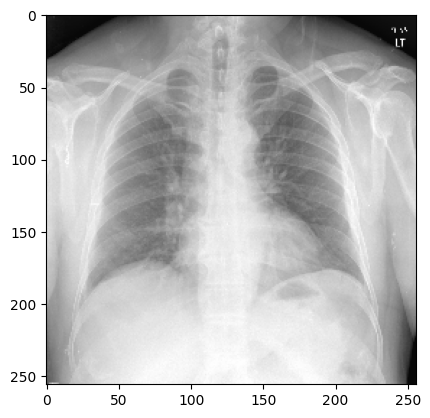

In [31]:
plt.imshow(X_img[0])
plt.show()

In [32]:
# print(X_report[0])
# print("====================")
# print(Y[0])

In [33]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from keras.layers import Flatten, Dense
# from keras.applications import DenseNet121

In [34]:
## Input layers
img_input = layers.Input(shape= (256,256,3)) 
report_input= layers.Input(shape= (max_len-1,))

## Encoder ######################

Densenet_model = tf.keras.applications.MobileNetV3Large(
            include_top=False,
            weights="imagenet",
            input_shape=(256,256,3),
        )
number_of_encoder_layers=  len(Densenet_model.layers)

encoder_output = Densenet_model(img_input)
encoder_output = layers.Flatten()(encoder_output)
encoder_output = layers.Dropout(0.2)(encoder_output)
encoder_output = layers.Dense(512,activation='relu')(encoder_output)

##decoder ########################

#layers
gru_layer =  layers.GRU(512, return_sequences=True)
dense_layer= layers.Dense(vocab_size,activation='softmax')
embedding_layer = layers.Embedding(vocab_size, 300, mask_zero=True)
dropout = layers.Dropout(0.2)

# decoder model
embedding_output = embedding_layer(report_input)
gru_output = gru_layer(embedding_output, initial_state=encoder_output )
gru_output = dropout(gru_output)
output  = dense_layer(gru_output)
model = Model([img_input,report_input ],output)

##Inference models ################

#encoder_inference model
encoder_model = Model(img_input,encoder_output)

#decoder_inference model
prev_hidden_state= layers.Input(shape= (512))
report_input2 = layers.Input(shape= (1,))
embedding_output2= embedding_layer(report_input2)
gru_output2 = gru_layer(embedding_output2, initial_state=prev_hidden_state )
gru_output2 = dropout(gru_output2)
output2 = dense_layer(gru_output2)
decoder_model = Model([report_input2,prev_hidden_state],[output2,gru_output2])


12683000/12683000 [==============================] - 0s 0us/step


In [35]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 MobilenetV3large (Function  (None, 8, 8, 960)            2996352   ['input_1[0][0]']             
 al)                                                                                              
                                                                                                  
 flatten (Flatten)           (None, 61440)                0         ['MobilenetV3large[0][0]']    
                                                                                                  
 input_2 (InputLayer)        [(None, 259)]                0         []                        

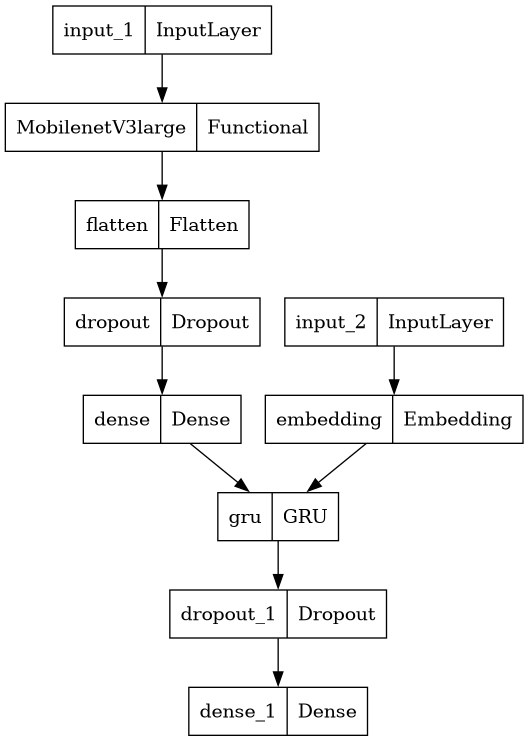

In [36]:
plot_model(model)

In [37]:
epochs=38
lr=1e-3
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr)),
metrics=["accuracy"]



In [38]:
hist = model.fit_generator( train_dataloader,
                    validation_data = val_dataloader,
                    epochs = epochs
                )

/tmp/ipykernel_42/2213431721.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator( train_dataloader,


Epoch 1/38
331/331 [==============================] - 281s 693ms/step - loss: 3.5166 - val_loss: 4.0755
Epoch 2/38
331/331 [==============================] - 163s 492ms/step - loss: 2.1840 - val_loss: 2.3510
Epoch 3/38
331/331 [==============================] - 163s 494ms/step - loss: 1.8169 - val_loss: 2.0127
Epoch 4/38
331/331 [==============================] - 164s 494ms/step - loss: 1.5756 - val_loss: 1.8821
Epoch 5/38
331/331 [==============================] - 164s 494ms/step - loss: 1.3925 - val_loss: 1.9698
Epoch 6/38
331/331 [==============================] - 164s 495ms/step - loss: 1.2538 - val_loss: 2.7061
Epoch 7/38
331/331 [==============================] - 163s 493ms/step - loss: 1.1237 - val_loss: 1.9535
Epoch 8/38
331/331 [==============================] - 163s 492ms/step - loss: 1.0118 - val_loss: 2.1855
Epoch 9/38
331/331 [==============================] - 161s 486ms/step - loss: 0.9183 - val_loss: 127.6065
Epoch 10/38
331/331 [==============================] - 161s 48

In [39]:
import numpy as np
from nltk.translate.bleu_score import corpus_bleu

In [40]:
def tokens_to_text(tokens,tok,end_token='end'):
    sentence=""
    for token in tokens:
        if token ==0:
            break
        
        word = tok.index_word[token]
        
        if word==end_token:
            break
            
        sentence+= word+" "
        
    sentence = sentence.strip()
    
    return sentence


def greedy_inference(input_img, tok,encoder_model, decoder_model,max_len,start_token="start",end_token='end',decoder_type="GRU"):
    if decoder_type=='LSTM':
        a0,c0  =encoder_model(np.expand_dims(input_img,axis=0))
    elif decoder_type=='GRU': 
        hidden_layer  =encoder_model(np.expand_dims(input_img,axis=0))
        
    word = tok.word_index[start_token]
    
    words = []
    
    for index in range(max_len):
        if decoder_type=='LSTM':
            word_probs , a0,c0 = decoder_model.predict([[np.array([word]),a0,c0]])
        elif decoder_type=='GRU': 
            word_probs , hidden_layer = decoder_model.predict([[np.array([word]),hidden_layer]])
            hidden_layer=hidden_layer[0]
        
        word = np.argmax(word_probs)
        
        try:
            if tok.index_word[word]==end_token:
                break
        except:
            pass
        
        words.append(word)
        
    words = tokens_to_text(words,tok)
    return words

(256, 256, 3)

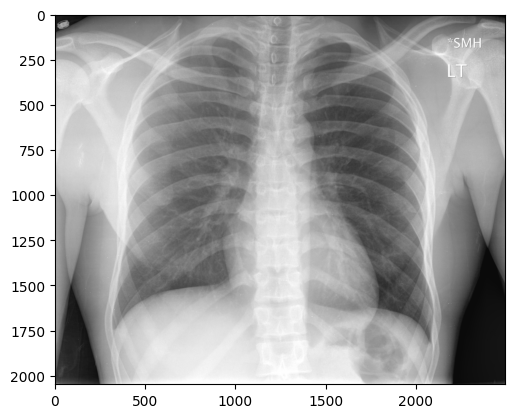

In [52]:
import cv2
image = cv2.imread("/kaggle/input/chest-xrays-indiana-university/images/images_normalized/2541_IM-1053-3001.dcm.png")
# print(image)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(image)
image = cv2.resize(image,(256,256))
image.shape

In [53]:
 pred_sentence = greedy_inference(image, tok,encoder_model, decoder_model,max_len,
                                                  start_token="start",end_token='end',decoder_type='GRU')

1/1 [==============================] - 0s 22ms/step


In [54]:
print(pred_sentence)

the cardiomediastinal silhouette is within normal limits for appearance no focal areas of pulmonary consolidation no pneumothorax no pleural effusion the thoracic spine appears intact no acute displaced rib fractures


In [44]:
def get_predictions_from_data_loader(data_loader,tok,encoder_model, decoder_model,max_len,start_token="start"
                                     ,end_token='end', inference_type='greedy',decoder_type='GRU'):
    
    data_loader_iterator = data_loader.__iter__()
    
    pred_sentences = []
    Gt_sentences = []
    for index, (X,Y) in enumerate(data_loader_iterator):
        for img,_,sample_y in zip(X[0],X[1],Y):
            
            if inference_type=='greedy':
                pred_sentence = greedy_inference(img, tok,encoder_model, decoder_model,max_len,
                                                 start_token="start",end_token='end',decoder_type='GRU')
            
            GT_sentence   = tokens_to_text(sample_y,tok)
            
            pred_sentences.append(pred_sentence)
            Gt_sentences.append(GT_sentence)
        
        if index == data_loader.nb_iteration -1:
            break
        print("Done with batch number: {} ", index)
   
    return  pred_sentences,Gt_sentences
    

In [ ]:
pred_sentences, GT_sentences = get_predictions_from_data_loader(val_dataloader,tok,encoder_model, decoder_model,max_len,start_token='start',end_token='end',decoder_type='GRU')


1/1 [==============================] - 0s 20ms/step
Done with batch number: {}  0
1/1 [==============================] - 0s 20ms/step
Done with batch number: {}  1
1/1 [==============================] - 0s 20ms/step
Done with batch number: {}  2
1/1 [==============================] - 0s 20ms/step
Done with batch number: {}  3
1/1 [==============================] - 0s 20ms/step
Done with batch number: {}  4
1/1 [==============================] - 0s 21ms/step
Done with batch number: {}  5
1/1 [==============================] - 0s 21ms/step
Done with batch number: {}  6
1/1 [==============================] - 0s 20ms/step
Done with batch number: {}  7
1/1 [==============================] - 0s 20ms/step
Done with batch number: {}  8
1/1 [==============================] - 0s 20ms/step
Done with batch number: {}  9
1/1 [==============================] - 0s 20ms/step
Done with batch number: {}  10
1/1 [==============================] - 0s 21ms/step
Done with batch number: {}  11
1/1 [=========

In [ ]:
for pred_sent, gt_sent in zip(pred_sentences, GT_sentences):

# First sentence is predicted and second is ground truth which is seperaed by ++++++
# the underscore seperates instances
    
    print (pred_sent+"\n ++++++++++++++ \n", gt_sent+"\n _____________________________ \n")

type(pred_sentences)


In [ ]:
!pip install rouge==1.0.1



In [48]:
from rouge import Rouge
rouge = Rouge() 
rouge.get_scores(pred_sentences, GT_sentences, avg = True)


{'rouge-1': {'r': 0.40668901835710886,
  'p': 0.4053294761920105,
  'f': 0.38384439496024625},
 'rouge-2': {'r': 0.1463346125007915,
  'p': 0.13946746528346476,
  'f': 0.1342126259015835},
 'rouge-l': {'r': 0.29996576676888836,
  'p': 0.2983126618192737,
  'f': 0.2824709369566964}}

In [49]:
def evaluate_from_dataloader(data_loader,tok,encoder_model, decoder_model,max_len,start_token="start",end_token='end', inference_type='greedy',decoder_type="GRU"):
    Gt_sentences, pred_sentences = get_predictions_from_data_loader(val_dataloader,tok,encoder_model, decoder_model,max_len,start_token=start_token,end_token=end_token, inference_type=inference_type,decoder_type=decoder_type)
    BLEU_1,BLEU_2,BLEU_3,BLEU_4 = calculate_bleu_evaluation(Gt_sentences, pred_sentences)
    
    return BLEU_1,BLEU_2,BLEU_3,BLEU_4

In [50]:
def calculate_bleu_evaluation(GT_sentences, predicted_sentences):
    BLEU_1 = corpus_bleu(GT_sentences, predicted_sentences, weights=(1,0, 0 ,0 ))
    BLEU_2 = corpus_bleu(GT_sentences, predicted_sentences, weights=(0.5, 0.5, 0, 0))
    BLEU_3 = corpus_bleu(GT_sentences, predicted_sentences, weights=(0.33, 0.33, 0.33, 0))
    BLEU_4 = corpus_bleu(GT_sentences, predicted_sentences, weights=(0.25, 0.25, 0.25, 0.25))
    return BLEU_1,BLEU_2,BLEU_3,BLEU_4

In [51]:
BLEU_1,BLEU_2,BLEU_3,BLEU_4 =  evaluate_from_dataloader(val_dataloader,tok,encoder_model, decoder_model,max_len)
print(BLEU_4)
print('-------')
print(BLEU_3),
print('-------')
print(BLEU_2)
print('-------'),
print(BLEU_1)

1/1 [==============================] - 0s 26ms/step
Done with batch number: {}  0
1/1 [==============================] - 0s 20ms/step
Done with batch number: {}  1
1/1 [==============================] - 0s 20ms/step
Done with batch number: {}  2
1/1 [==============================] - 0s 20ms/step
Done with batch number: {}  3
1/1 [==============================] - 0s 19ms/step
Done with batch number: {}  4
1/1 [==============================] - ETA: 0s

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 21ms/step
Done with batch number: {}  12
1/1 [==============================] - 0s 20ms/step
Done with batch number: {}  13
1/1 [==============================] - 0s 20ms/step
Done with batch number: {}  14
1/1 [==============================] - 0s 19ms/step
Done with batch number: {}  15
1/1 [==============================] - 0s 21ms/step
Done with batch number: {}  16
1/1 [==============================] - 0s 21ms/step
Done with batch number: {}  17
1/1 [==============================] - 0s 20ms/step
Done with batch number: {}  18
1/1 [==============================] - 0s 20ms/step
Done with batch number: {}  19
1/1 [==============================] - 0s 19ms/step
Done with batch number: {}  20
1/1 [==============================] - 0s 21ms/step
Done with batch number: {}  21
1/1 [==============================] - 0s 21ms/step
Done with batch number: {}  22
1/1 [==============================] - 0s 19ms/step
Done with batch number: {}  23
1/1 